808.4284989122475


[(635, 140),
 (634, 141),
 (633, 142),
 (632, 143),
 (631, 144),
 (630, 145),
 (629, 146),
 (628, 147),
 (627, 148),
 (626, 149),
 (625, 150),
 (624, 151),
 (623, 152),
 (622, 153),
 (621, 153),
 (620, 153),
 (619, 153),
 (618, 153),
 (617, 154),
 (616, 155),
 (615, 156),
 (614, 157),
 (613, 158),
 (612, 158),
 (611, 158),
 (610, 158),
 (609, 159),
 (608, 160),
 (607, 160),
 (606, 161),
 (605, 161),
 (604, 161),
 (603, 161),
 (602, 161),
 (601, 162),
 (600, 162),
 (599, 162),
 (598, 162),
 (597, 163),
 (596, 163),
 (595, 163),
 (594, 164),
 (593, 164),
 (592, 164),
 (591, 165),
 (590, 165),
 (589, 165),
 (588, 166),
 (587, 166),
 (586, 166),
 (585, 166),
 (584, 166),
 (583, 166),
 (582, 166),
 (581, 166),
 (580, 167),
 (579, 168),
 (578, 169),
 (577, 170),
 (576, 171),
 (575, 172),
 (574, 173),
 (573, 174),
 (572, 175),
 (571, 176),
 (570, 177),
 (569, 178),
 (568, 179),
 (567, 179),
 (566, 179),
 (565, 179),
 (564, 180),
 (563, 181),
 (562, 182),
 (561, 183),
 (560, 183),
 (559, 183),

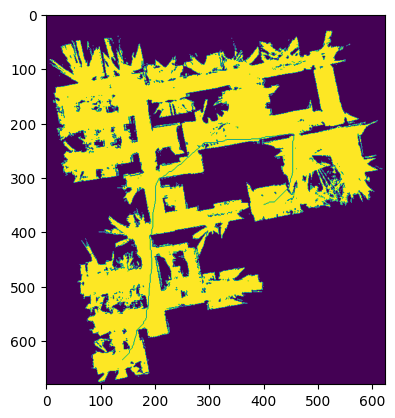

In [15]:
#Load the PIL, numpy, and heapq libraries
from PIL import Image, ImageDraw
import numpy as np
import heapq as q
from matplotlib.pyplot import imshow
import sys

#Read image from disk using PIL
occupancy_map_img = Image.open('occupancy_map.png')

#Interpret this image as a numpy array, and threshold its values to {0,1}
occupancy_grid = (np.asarray(occupancy_map_img) > 0).astype(int)

#Create a Vertex list
V = []
for i in range(occupancy_grid.shape[0]):
    for j in range(occupancy_grid.shape[1]):
        if occupancy_grid[i][j] == 1:
            V.append((i,j))

#Assing the starting and goal
s = (635,140)
g = (350,400)
            
def RecoverPath(s,g,pred):
    path = []
    path.insert(0,g)
    v = g
    while s not in path:
        path.insert(0,pred[v])
        v = pred[v]
    
    return path

def N(v):
    neighbors = set()    #empty neighbors set
    #check if 8 connected vertices around the vertex v are in the occupancy grid
    if (v[0]-1,v[1]-1) in V:
        neighbors.add((v[0]-1,v[1]-1))
    if (v[0]-1,v[1]) in V:
        neighbors.add((v[0]-1,v[1]))
    if (v[0]-1,v[1]+1) in V:
        neighbors.add((v[0]-1,v[1]+1))
    if (v[0],v[1]-1) in V:
        neighbors.add((v[0],v[1]-1))
    if (v[0],v[1]+1) in V:
        neighbors.add((v[0],v[1]+1))
    if (v[0]+1,v[1]-1) in V:
        neighbors.add((v[0]+1,v[1]-1))
    if (v[0]+1,v[1]) in V:
        neighbors.add((v[0]+1,v[1]))
    if (v[0]+1,v[1]+1) in V:
        neighbors.add((v[0]+1,v[1]+1))
    return neighbors

def d(v1,v2):
    #return the euclidian distance between the two vertices
    point1 = np.array(v1)
    point2 = np.array(v2)
    return np.linalg.norm(point1 - point2)

def search(V,s,g,N,d):    #w() and h() are replaced with d()
    #Initialization
    CostTo = {}
    EstTotalCost = {}
    pred = {}
    for v in V:
        CostTo[v] = np.inf
        EstTotalCost[v] = np.inf
        
    CostTo[s] = 0
    EstTotalCost[s] = d(s,g)
    
    Q = []
    q.heapify(Q)
    q.heappush(Q,(d(s,g),s))
    
    #Main loop
    while len(Q) != 0:
        Qv = q.heappop(Q)
        vertex = Qv[1]
        if vertex == g:
            #Print the total length
            print(EstTotalCost[pred[g]])    #The last emstimation is the same as the total length
            
            path = RecoverPath(s,g,pred)
            
            #Plot the path on the image
            draw = ImageDraw.Draw(occupancy_map_img)
            for draw_idx in range(len(path)-1):
                #flip the tuple element of the path list since draw.line recognizes the coordinates as (x,y)
                draw.line((path[draw_idx][1],path[draw_idx][0])+(path[draw_idx+1][1],path[draw_idx+1][0]),fill="red")
            imshow(occupancy_map_img)
            
            return path
        
        for k in N(vertex):
            pvi = CostTo[vertex] + d(vertex,k)
            if pvi < CostTo[k]:
                #The path to i through v is better than the previously known best path to i,
                #so record it as the new best path to i
                pred[k] = vertex
                CostTo[k] = pvi
                EstTotalCost[k] = pvi + d(k,g)
                
                idx = 0
                m = []
                for l in range(len(Q)):
                    m.insert(0,Q[l][1])
                for l in m:
                    #Update i's priority
                    if k == l:
                        Q[idx] = (EstTotalCost[k],k)
                        break
                    idx = idx + 1
                #if i is not in Q        
                if idx == len(Q):
                    q.heappush(Q,(EstTotalCost[k],k))
    
    #Print the total length
    print(CostTo[g])
    
    
    
    return {}    #Return empty set

search(V,s,g,N,d)
